***INTRODUCCIÓN A OPTIMIZACIÓN CON PYTHON***
Lo básico en un problema de optimización es tener una función objetivo y un optimizador.

In [2]:
# cargamos paquestes básicos y optimize
import numpy as np
import matplotlib.pyplot as pl
import scipy.optimize as opt

Optimization terminated successfully.
         Current function value: 14.750000
         Iterations: 18
         Function evaluations: 36
minimo en [2.5]


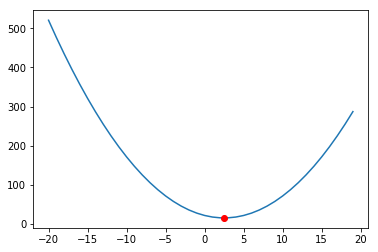

In [13]:
# minimizar muy simple
def func(x):
    return (x-3)**2+x+12
x=np.arange(-20,20)
pl.plot(x,func(x))
x0=np.random.uniform(1)
xopt=opt.fmin(func,x0)
print 'minimo en', xopt
pl.plot(xopt,func(xopt),'or')

In [106]:
import pandas as pd
df = pd.read_excel("dietMedium.xls",nrows=17)

food_items = list(df['Foods'])
costs=list(df['Price/Serving'])
#costs = dict(zip(food_items,df['Price/Serving']))
costs=list(df['Price/Serving'])
calories = list(df['Calories'])
fat = list(df['Total_Fat (g)'])
carbs = list(df['Carbohydrates (g)'])
proteins=list(df['Protein (g)'])
sodium=list(df['Sodium (mg)'])
portion=list(df['Serving Size'])
fiber=list(df['Dietary_Fiber (g)'])



#print df.info()

In [107]:
# solo queremos minimizar precio:
def func(x):
    return np.sum(x*np.array(costs))

def func2(x):
    return (np.sum(x*np.array(costs))-30)**2
    
x0=np.random.uniform(size=len(food_items))
res=opt.fmin(func2,x0)  # minimizamos función func, y le tenemos que dar un valor inicial

print res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 455
         Function evaluations: 738
[-0.14116753  2.36065662 -3.92675267 -0.04270196 -4.12499099  0.02826097
 11.39130899  4.31405666  2.13218826  2.04809114 -0.24175153 -0.32749788
 -0.18513138  1.01258971  3.5942697   0.07975597 -0.25128432]


In [154]:
print np.shape(bnds),type(bnds)
res=opt.minimize(func,x0,bounds=len(x0)*[(0,None)])  # bounds(0,inf) para cada una de las variables 17*([0,inf])
print 'Total price',np.round(np.sum(res.x*costs),2)


for i in range(len(costs)):
       print food_items[i],np.round(res.x[i],2),portion[i]



17 (17, 2)
<type 'list'>
(3, 2) <type 'tuple'>
Total price 0.0
Frozen Broccoli 0.0 10 Oz Pkg
Frozen Corn 0.0 1/2 Cup
Raw Lettuce Iceberg 0.0 1 Leaf
 Baked Potatoes 0.0 1/2 Cup
Tofu 0.0 1/4 block
Roasted Chicken 0.0 1 lb chicken
Spaghetti W/ Sauce 0.0 1 1/2 Cup
Raw Apple 0.0 1 Fruit,3/Lb,Wo/Rf
Banana 0.0 1 Fruit,Wo/Skn&Seeds
Wheat Bread 0.0 1 Sl
White Bread 0.0 1 Sl
Oatmeal Cookies 0.0 1 Cookie
Apple Pie 0.0 1 Oz
Scrambled Eggs 0.0 1 Egg
Turkey Bologna 0.0 1 Oz
Beef Frankfurter 0.0 1 Frankfurter
Chocolate Chip Cookies 0.0 1 Cookie


In [ ]:
res=opt.minimize(func2,x0,bounds=len(x0)*[(0,None)])
res.x
print 'Total price',np.round(np.sum(res.x*costs),2)
for i in range(len(costs)):
       print food_items[i],np.round(res.x[i],2),portion[i]

Nos dan cosas negativas! tenemos que poner restricciones


In [37]:
help(opt.linprog)

Help on function linprog in module scipy.optimize._linprog:

linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None)
    Minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear Programming is intended to solve the following problem form::
    
        Minimize:     c^T * x
    
        Subject to:   A_ub * x <= b_ub
                      A_eq * x == b_eq
    
    Parameters
    ----------
    c : array_like
        Coefficients of the linear objective function to be minimized.
    A_ub : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, gives the values of
        the upper-bound inequality constraints at ``x``.
    b_ub : array_like, optional
        1-D array of values representing the upper-bound of each inequality
        constraint (row) in ``A_ub``.
    A_eq : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, 

In [130]:
# coeficientes que multiplican las variables en la función que queremos minimizar (precio)
c=np.array(costs)
# equaciones:

# suma de calorías == 1200 
A0=np.array(calories)
b0=1300
# ahora añadimos desigualdades
# suma de proteínas >= 50, como tiene que se ub, cambiamos signo
A1=-np.array(calories)
B1=-1000
# alta baja en sal sodium_1*x_1+sodium_2*x_2+... < 50mg

A2= np.array(sodium) 
B2= 50.

A=[A0,A1,A2]
b=[b0,B1,B2]
# si queremos alguna igualdad se puede añadir quenerando Aeq y beq de la misma forma

# bounds si solo se pone uno se asume que es el mismo para todos, pero podríamos poner tantos como variables 
#(lb y ub para cada variable)
Bounds=(0,None)
res=opt.linprog(c,A_ub=A,b_ub=b,bounds=Bounds)
print res
# valores de x en res.x y valo función en res.fun

(3, 17) (17,) (3,) (3,)
     fun: 2.6513518704253
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([300.,   0.,   0.])
  status: 0
 success: True
       x: array([0.        , 0.        , 0.        , 2.94843616, 0.        ,
       0.        , 0.        , 0.        , 4.71251858, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])


In [131]:

print 'Precio Total',np.round(np.sum(res.x*c),2)
print 'Precio Total',np.round(res.fun,2)

for i in range(len(costs)):
    if res.x[i]!=0:
       print food_items[i],np.round(res.x[i],2),portion[i]




Precio Total 2.65
Precio Total 2.65
 Baked Potatoes 2.95 1/2 Cup
Banana 4.71 1 Fruit,Wo/Skn&Seeds


In [168]:
# coeficientes que multiplican las variables en la función que queremos minimizar (precio)
c=np.array(costs)
# equaciones:

# suma de calorías == 1200 
A0=np.array(calories)
b0=1300
# ahora añadimos desigualdades
# suma de proteínas >= 50, como tiene que se ub, cambiamos signo
A1=-np.array(calories)
B1=-800
# baja en  grasa
# Fat
A2= -np.array(fat) 
B2= -20.0

A3= np.array(fat) 
B3= 50.0

# carbohidratos
A4= -np.array(carbs) 
B4= -130.0

A5= np.array(carbs) 
B5= 200.0

A4= -np.array(fiber) 
B4= -60.

A5= np.array(fiber) 
B5= 125.
# Fiber
# Protein
A6= -np.array(proteins) 
B6= -100.

A7= np.array(proteins) 
B7= 125.


A=[A0,A1,A2,A3,A4,A5,A6,A7]
b=[b0,B1,B2,B3,B4,B5,B6,B7]
# si queremos alguna igualdad se puede añadir quenerando Aeq y beq de la misma forma
# bounds si solo se pone uno se asume que es el mismo para todos, pero podríamos poner tantos como variables 
#(lb y ub para cada variable)
Bounds=(0,None)
res=opt.linprog(c,A_ub=A,b_ub=b,bounds=Bounds)

print 'Precio Total',np.round(res.fun,2)

pos=np.where(res.x!=0)[0]
for i in range(len(costs)):
    if res.x[i]!=0:
       print food_items[i],np.round(res.x[i],2),portion[i]



Precio Total 5.52
Frozen Broccoli 6.92 10 Oz Pkg
 Baked Potatoes 1.08 1/2 Cup
Scrambled Eggs 6.06 1 Egg


*** non linear function ***

En vez de minimizar el coste, queremos por ejemplo hacer el menú que tenga un coste más cercano a 30 dólares

utilizarmeos opt.minimize que es más general y se pueden poner tanto constraints lineales como no lineales.

opt.minimize tiene ventaja sobre linprog, que te deja poner lb < A < ub, lo que simplifica las ecuaciones.

"desventajas" hay que poner bounds para todos, hay que darle las derivadas dfunc/dx_i

In [184]:
from scipy.optimize import LinearConstraint

# definimos función
def func2(x):
    return (np.sum(x*np.array(costs))-30)**2
def jac(x):
    return 2*(np.sum(x*np.array(costs))-30)*np.array(costs)
#def func(x):
#    return (np.sum(x*np.array(costs)))
#def jac(x):
 #   return np.array(costs)

A0=np.array(calories)
u0=1300
l0=800
# baja en  grasa
# Fat
A1= np.array(fat) 
l1= 20.0
u1= 50.0

# carbohidratos
A2= np.array(carbs) 
l2= 130.0
u2= 200.0

A3= np.array(fiber) 
l3= 60.
u3= 125.
# Fiber
# Protein
A4= np.array(proteins) 
l4= 100.
u4= 125.

bounds=len(x0)*[(0,None)]# [valores minimos variables], [valores maximos variables]
A=[A0,A1,A2,A3,A4]
lb=[l0,l1,l2,l3,l4] # si tuvieramos más desigualdades tantos valores como inecuaciones
ub=[u0,u1,u2,u3,u4]  # si tuvieramos más desigualdades tantos valores como inecuaciones

LinCons=LinearConstraint(A,lb,ub)
res = opt.minimize(func2, x0, method='trust-constr', jac=jac,hess='3-point',constraints=LinCons,options={'verbose': 1}, bounds=bounds)
print 'Precio Total',np.round(np.sum(res.x*np.array(costs)),2)

for i in range(len(costs)):
    if np.round(res.x[i],2)!=0:
       print food_items[i],np.round(res.x[i],2),portion[i]

`gtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 34, CG iterations: 164, optimality: 3.65e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
Precio Total 26.07
Raw Lettuce Iceberg 396.66 1 Leaf
Tofu 1.73 1/4 block
Beef Frankfurter 0.82 1 Frankfurter


In [41]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide code "></form>''')